<a href="https://colab.research.google.com/github/richapatel93/COVID19_Descriptive_Statistics/blob/main/COVID19_Descriptive_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import zipfile
import os

# Upload ZIP file manually
uploaded = files.upload()

# Extract ZIP file
for filename in uploaded.keys():
    if filename.endswith('.zip'):
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall()  # Extract in the current directory
        print("Files extracted successfully.")


Saving COVID -19 INDIA STATEWISE.zip to COVID -19 INDIA STATEWISE.zip
Files extracted successfully.


Load the CSV Data into Pandas

In [4]:
import pandas as pd

# Correct file name based on extracted files
file_name = "Latest Covid-19 India Status.csv"  # Update with the correct file name

# Load the dataset
df = pd.read_csv(file_name)

# Display first 5 rows
df.head()


,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10766,0,10637,129,0.0,98.80,1.20,100896618
1,Andhra Pradesh,2340676,0,2325943,14733,0.0,99.37,0.63,128500364
2,Arunachal Pradesh,67049,0,66753,296,0.0,99.56,0.44,658019
3,Assam,746159,5,738119,8035,0.0,98.92,1.08,290492
4,Bihar,855267,1,842952,12314,0.0,98.56,1.44,40100376


# Data Cleaning & Preprocessing

Check for Missing Values

In [5]:
# Check for missing values in each column
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 State/UTs          0
Total Cases        0
Active             0
Discharged         0
Deaths             0
Active Ratio       0
Discharge Ratio    0
Death Ratio        0
Population         0
dtype: int64


Check Data Types of Each Column



In [6]:
# Check data types of all columns
print("\nData Types:\n", df.dtypes)



Data Types:
 State/UTs           object
Total Cases          int64
Active               int64
Discharged           int64
Deaths               int64
Active Ratio       float64
Discharge Ratio    float64
Death Ratio        float64
Population           int64
dtype: object


Check for Duplicate Rows:


In [7]:
# Check for duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())



Duplicate Rows: 0


# Handle Missing or Incorrect Data

In [9]:
df = df.dropna()  # Remove rows with missing values
df.fillna(0, inplace=True)  # Replace missing values with 0


# Descriptive Statistics

In [11]:
#Calculate summary statistics:
summary = df.describe()
print(summary)

        Total Cases       Active    Discharged         Deaths  Active Ratio  \
count  3.600000e+01    36.000000  3.600000e+01      36.000000     36.000000   
mean   1.249975e+06    50.333333  1.235146e+06   14778.527778      0.005000   
std    1.846038e+06   207.118048  1.820328e+06   27221.140636      0.026673   
min    1.076600e+04     0.000000  1.063700e+04       4.000000      0.000000   
25%    1.065430e+05     0.000000  1.055395e+05    1124.250000      0.000000   
50%    6.140910e+05     1.500000  6.076750e+05    6551.000000      0.000000   
75%    1.331951e+06     9.000000  1.322329e+06   14325.750000      0.000000   
max    8.171048e+06  1233.000000  8.022276e+06  148558.000000      0.160000   

       Discharge Ratio  Death Ratio    Population  
count        36.000000    36.000000  3.600000e+01  
mean         98.897222     1.097778  3.971861e+07  
std           0.506854     0.494791  5.050913e+07  
min          97.410000     0.030000  6.600100e+04  
25%          98.690000     0

In [12]:
#dentify top 5 states with Highest total cases:

top_total_cases = df.nlargest(5, 'Total Cases')[['State/UTs', 'Total Cases']]
print(top_total_cases)

         State/UTs  Total Cases
20     Maharashtra      8171048
16          Kerala      6907241
15       Karnataka      4088769
30      Tamil Nadu      3610655
1   Andhra Pradesh      2340676


In [13]:
#Highest active cases:
top_active_cases = df.nlargest(5, 'Active')[['State/UTs', 'Active']]
print(top_active_cases)

        State/UTs  Active
27         Punjab    1233
20    Maharashtra     214
35    West Bengal     135
25         Odisha      59
33  Uttar Pradesh      57


In [14]:
#Highest deaths:
top_deaths = df.nlargest(5, 'Deaths')[['State/UTs', 'Deaths']]
print(top_deaths)

      State/UTs  Deaths
20  Maharashtra  148558
16       Kerala   72042
15    Karnataka   40358
30   Tamil Nadu   38081
8         Delhi   26666


In [15]:
#Calculate case per capita:
df['Case Per Capita'] = (df['Total Cases'] / df['Population']) * 100000
print(df[['State/UTs', 'Case Per Capita']].sort_values(by='Case Per Capita', ascending=False).head())

            State/UTs  Case Per Capita
20        Maharashtra     2.047877e+06
13  Jammu and Kashmir     7.303268e+05
8               Delhi     2.636845e+05
3               Assam     2.568604e+05
15          Karnataka     2.388374e+05


# Identifying High-Risk States

In [17]:
#  states with highest Death Ratio (%)
df['Death Ratio (%)'] = df['Death Ratio']  # Ensure it's treated as percentage
top_death_ratio_states = df[['State/UTs', 'Death Ratio (%)']].sort_values(by='Death Ratio (%)', ascending=False).head(5)
print("\nTop 5 States with Highest Death Ratios:\n", top_death_ratio_states)

#  states with lowest Discharge Ratio (%)
df['Discharge Ratio (%)'] = df['Discharge Ratio']  # Ensure it's treated as percentage
top_low_discharge_states = df[['State/UTs', 'Discharge Ratio (%)']].sort_values(by='Discharge Ratio (%)').head(5)
print("\nTop 5 States with Lowest Discharge Ratios:\n", top_low_discharge_states)


Top 5 States with Highest Death Ratios:
       State/UTs  Death Ratio (%)
27       Punjab             2.44
24     Nagaland             2.17
20  Maharashtra             1.82
34  Uttarakhand             1.72
22    Meghalaya             1.68

Top 5 States with Lowest Discharge Ratios:
       State/UTs  Discharge Ratio (%)
27       Punjab                97.41
24     Nagaland                97.83
20  Maharashtra                98.18
34  Uttarakhand                98.28
22    Meghalaya                98.32


# COVID Severity Index

In [18]:
# Calculate COVID Severity Index
df['Severity Index'] = (df['Active'] / df['Population']) + (df['Death Ratio'] * 100)

# Sort by Severity Index to find the most severe states
top_severity_states = df[['State/UTs', 'Severity Index']].sort_values(by='Severity Index', ascending=False).head(5)
print("\nTop 5 States with Highest Severity Index:\n", top_severity_states)



Top 5 States with Highest Severity Index:
       State/UTs  Severity Index
27       Punjab      244.000036
24     Nagaland      217.000000
20  Maharashtra      182.000536
34  Uttarakhand      172.000000
22    Meghalaya      168.000000


In [19]:
# 5 states with highest Active Cases
top_active_states = df[['State/UTs', 'Active']].sort_values(by='Active', ascending=False).head(5)
print("Top 5 States with Highest Active Cases:\n", top_active_states)

Top 5 States with Highest Active Cases:
         State/UTs  Active
27         Punjab    1233
20    Maharashtra     214
35    West Bengal     135
25         Odisha      59
33  Uttar Pradesh      57


# Data Visualization

Bar Chart: Top 5 States with Highest Total Cases

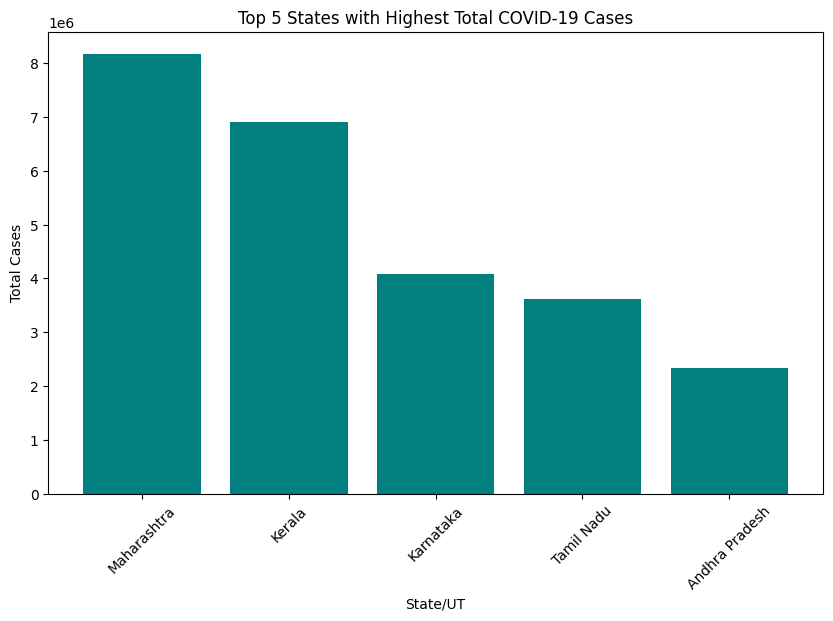

In [25]:
# Sort the DataFrame by 'Total Cases' and select top 5 states
top_5_states_cases = df[['State/UTs', 'Total Cases']].sort_values(by='Total Cases', ascending=False).head(5)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_5_states_cases['State/UTs'], top_5_states_cases['Total Cases'], color='teal')
plt.xticks(rotation=45)
plt.title('Top 5 States with Highest Total COVID-19 Cases')
plt.xlabel('State/UT')
plt.ylabel('Total Cases')
plt.show()


# Histogram of Total COVID-19 Cases

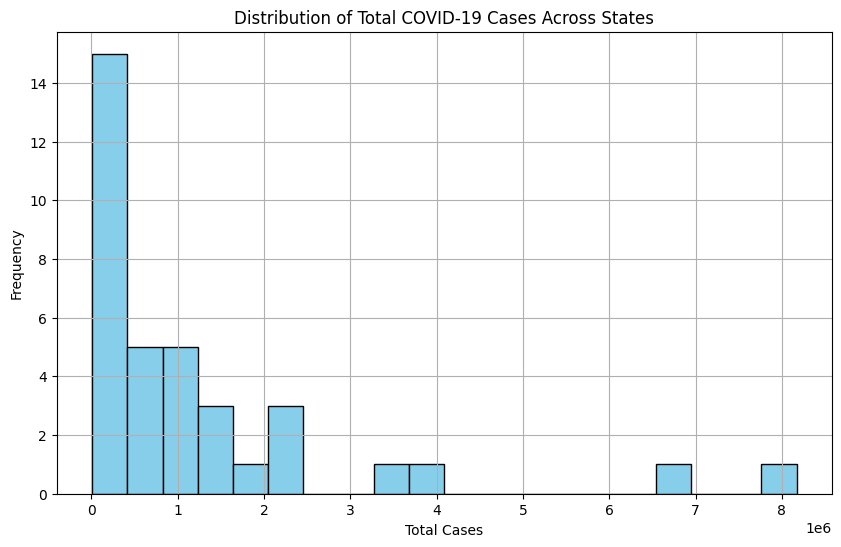

In [20]:
import matplotlib.pyplot as plt

# Plot histogram for Total Cases
plt.figure(figsize=(10, 6))
plt.hist(df['Total Cases'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total COVID-19 Cases Across States')
plt.xlabel('Total Cases')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Boxplot of Deaths to Detect Outliers

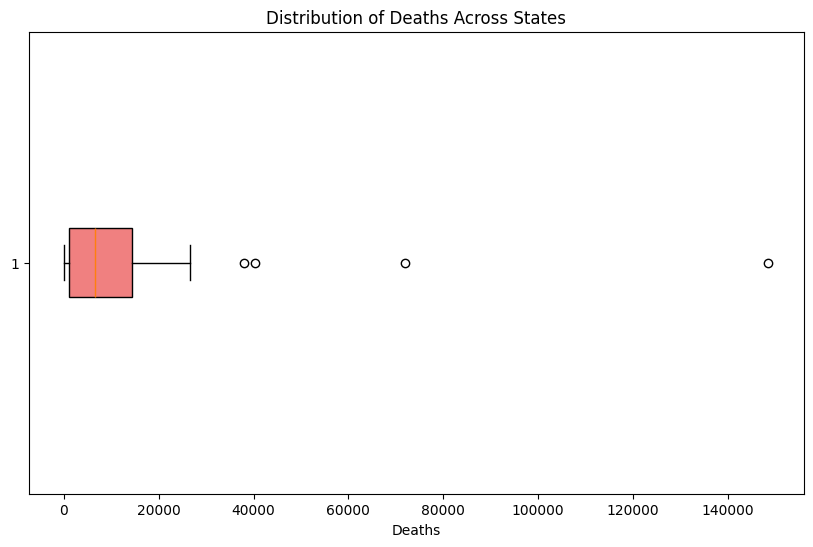

In [21]:
# Boxplot for Deaths
plt.figure(figsize=(10, 6))
plt.boxplot(df['Deaths'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.title('Distribution of Deaths Across States')
plt.xlabel('Deaths')
plt.show()


Bar Chart of Death Ratio per State

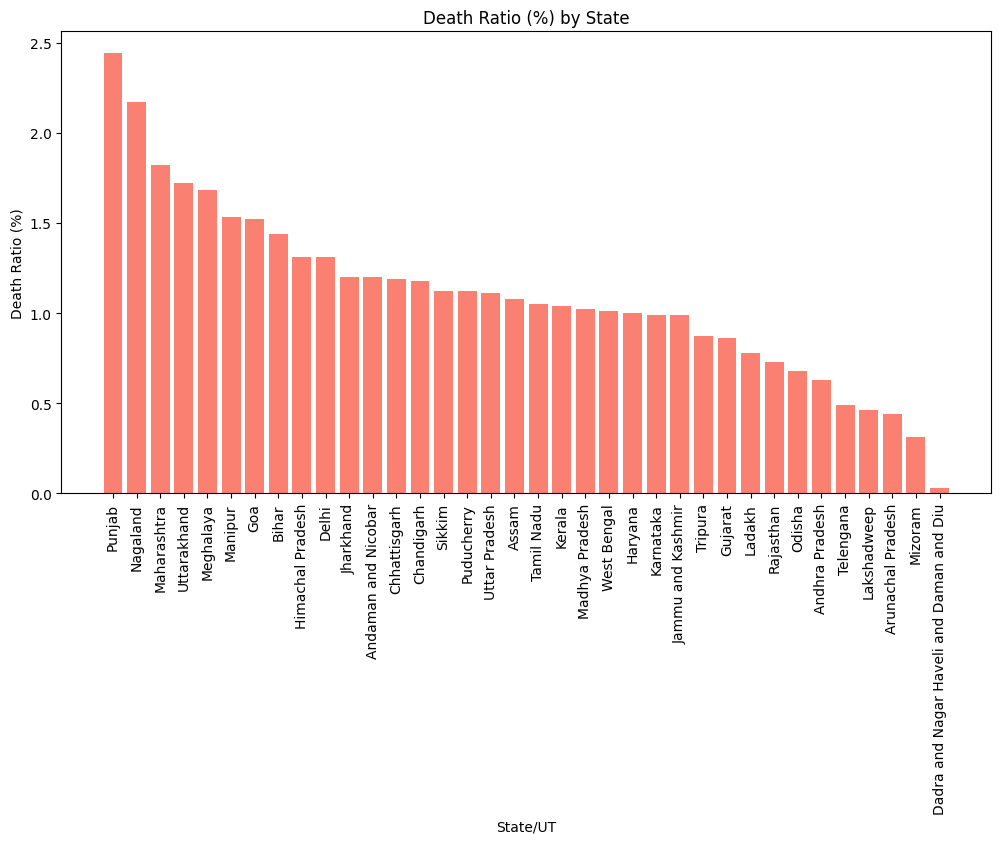

In [22]:
# Bar chart for Death Ratio by State
plt.figure(figsize=(12, 6))
df_sorted_death_ratio = df[['State/UTs', 'Death Ratio (%)']].sort_values(by='Death Ratio (%)', ascending=False)
plt.bar(df_sorted_death_ratio['State/UTs'], df_sorted_death_ratio['Death Ratio (%)'], color='salmon')
plt.xticks(rotation=90)
plt.title('Death Ratio (%) by State')
plt.xlabel('State/UT')
plt.ylabel('Death Ratio (%)')
plt.show()


Scatter Plot of Population vs Total Cases

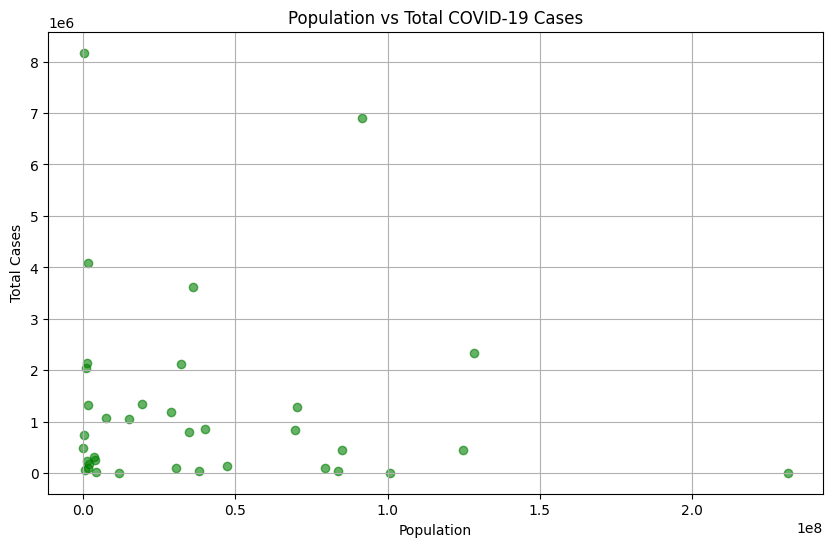

In [23]:
# Scatter plot for Population vs Total Cases
plt.figure(figsize=(10, 6))
plt.scatter(df['Population'], df['Total Cases'], color='green', alpha=0.6)
plt.title('Population vs Total COVID-19 Cases')
plt.xlabel('Population')
plt.ylabel('Total Cases')
plt.grid(True)
plt.show()


Heatmap of the Correlation Matrix

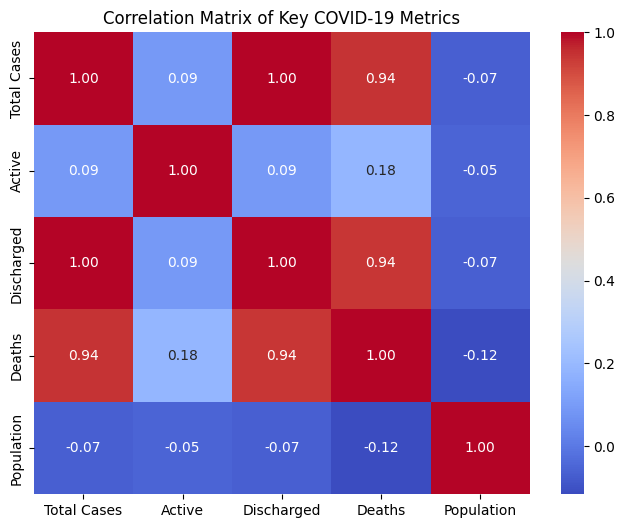

In [24]:
import seaborn as sns

# Correlation matrix
correlation_matrix = df[['Total Cases', 'Active', 'Discharged', 'Deaths', 'Population']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Key COVID-19 Metrics')
plt.show()


# Clustering - K-Means on Active Ratio, Discharge Ratio, and Death Ratio

In [26]:
from sklearn.cluster import KMeans
import numpy as np

# Select relevant columns for clustering
X = df[['Active Ratio', 'Discharge Ratio', 'Death Ratio']]

# Standardize the data (important for K-means)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering (choosing 3 clusters for this example)
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Show states in each cluster
for i in range(3):
    print(f"\nStates in Cluster {i}:\n", df[df['Cluster'] == i][['State/UTs', 'Active Ratio', 'Discharge Ratio', 'Death Ratio']])



States in Cluster 0:
                                    State/UTs  Active Ratio  Discharge Ratio  \
0                        Andaman and Nicobar          0.00            98.80   
1                             Andhra Pradesh          0.00            99.37   
2                          Arunachal Pradesh          0.00            99.56   
3                                      Assam          0.00            98.92   
5                                 Chandigarh          0.00            98.82   
6                               Chhattisgarh          0.00            98.81   
7   Dadra and Nagar Haveli and Daman and Diu          0.00            99.97   
10                                   Gujarat          0.00            99.14   
11                                   Haryana          0.00            99.00   
13                         Jammu and Kashmir          0.00            99.01   
14                                 Jharkhand          0.00            98.80   
15                           

# Outlier Detection Using Z-Scores

In [27]:
from scipy import stats

# Calculate Z-scores for Active Ratio (%)
z_scores = stats.zscore(df['Active Ratio'])
abs_z_scores = abs(z_scores)

# Identify outliers (Z-score > 3)
outliers = df[abs_z_scores > 3]
print("Outliers in Active Ratio (%):\n", outliers[['State/UTs', 'Active Ratio']])


Outliers in Active Ratio (%):
    State/UTs  Active Ratio
27    Punjab          0.16


Hypothesis Testing - States with Higher Populations Have Higher Total Cases

In [28]:
from scipy import stats

# Split the data into two groups: high population (above median) and low population (below median)
population_median = df['Population'].median()
high_population = df[df['Population'] > population_median]['Total Cases']
low_population = df[df['Population'] <= population_median]['Total Cases']

# Perform t-test to compare means of two groups
t_stat, p_value = stats.ttest_ind(high_population, low_population)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Determine if the result is significant (commonly p < 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis: Higher populations are associated with higher total cases.")
else:
    print("Fail to reject the null hypothesis: No significant association between population size and total cases.")


T-statistic: -0.21456936965430545
P-value: 0.8313848449750403
Fail to reject the null hypothesis: No significant association between population size and total cases.
